# Imports

In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

#Load the dataset

In [5]:
os.makedirs('/root/.kaggle', exist_ok=True)
kaggle_credentials = {
    "username": "jaafarbenkhaled22",
    "key": "KGAT_e78eca23506713e2a94ea2bc7c0b19b6"
}

with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

    !chmod 600 /root/.kaggle/kaggle.json




#download kaggle API
!pip install -q kaggle

!kaggle datasets download -d hrokrin/the-largest-diamond-dataset-currely-on-kaggle
!unzip -q the-largest-diamond-dataset-currely-on-kaggle.zip

Dataset URL: https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 706MB/s]


#Problem: Predict the total sales price of a diamond based on its physical and quality characteristics.
#Dependent variable : Price
# Assumptions:
* This is a supervised regression problem
* Historical diamond prices are accurate
* Features like carat, cut, color, clarity influence price

#Constraints: Fixed dataset, offline training, no real-time inference

#Metric used:
* R² --> Shows model quality (% variance explained)
* RMSE --> interpretable + penalizes big errors

#EDA:


In [18]:
df = pd.read_csv('diamonds.csv')


# Basic info
df.info()

# data type
print(f"\nData Types:")
df.dtypes.value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

,count
object,18
float64,6
int64,2


In [19]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [28]:
from scipy.stats import skew
# Q2 (2 points)




target = 'total_sales_price'

#Summary Statistics
print(f"\nPrice Statistics:")
print(f"   Count:    {df[target].count():,}")
print(f"   Mean:     ${df[target].mean():,.2f}")
print(f"   Median:   ${df[target].median():,.2f}")
print(f"   Std Dev:  ${df[target].std():,.2f}")
print(f"   Min:      ${df[target].min():,.2f}")
print(f"   25th %:   ${df[target].quantile(0.25):,.2f}")
print(f"   75th %:   ${df[target].quantile(0.75):,.2f}")
print(f"   Max:      ${df[target].max():,.2f}")


# Check skewness
price_skew = skew(df[target])
print(f"\nSkewness: {price_skew:.3f}")  #Moderately right-skewed > 0.5


Price Statistics:
   Count:    219,703
   Mean:     $6,908.06
   Median:   $1,970.00
   Std Dev:  $25,959.49
   Min:      $200.00
   25th %:   $958.00
   75th %:   $5,207.00
   Max:      $1,449,881.00

Skewness: 19.410


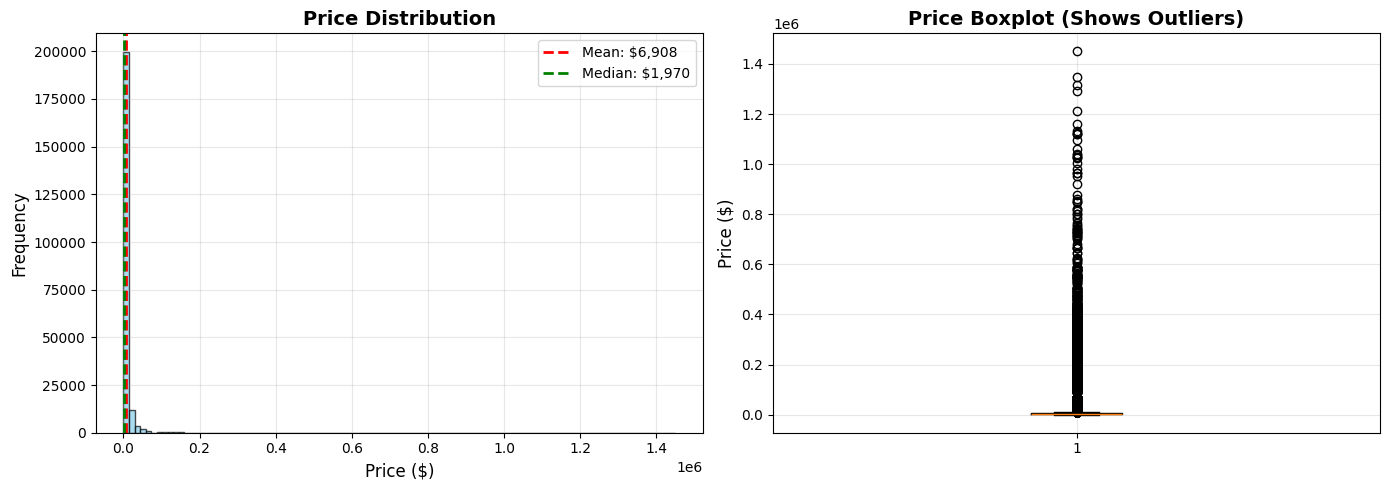

In [35]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[target], bins=100, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df[target].mean():,.0f}')
axes[0].axvline(df[target].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df[target].median():,.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df[target], vert=True)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].set_title('Price Boxplot (Shows Outliers)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [72]:
# Get numerical columns (exclude target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)

# Calculate correlations
correlations = df[numerical_cols].corrwith(df[target]).sort_values(ascending=False)

print(f"\nCorrelation with Price:")
print(correlations)




Correlation with Price:
carat_weight     0.745963
meas_width       0.506403
meas_length      0.489218
Unnamed: 0       0.330844
meas_depth       0.216410
table_percent    0.045192
depth_percent    0.025408
dtype: float64


cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64

Average Price by Cut:
cut
Cushion             23645.741021
Asscher             18663.314269
Radiant             16734.435524
Cushion Modified    15355.634036
Emerald             12117.904517
Pear                11597.651623
Oval                10286.717904
Heart                9804.151445
Princess             8573.694610
Marquise             7887.863169
Round                5031.851146
Name: total_sales_price, dtype: float64


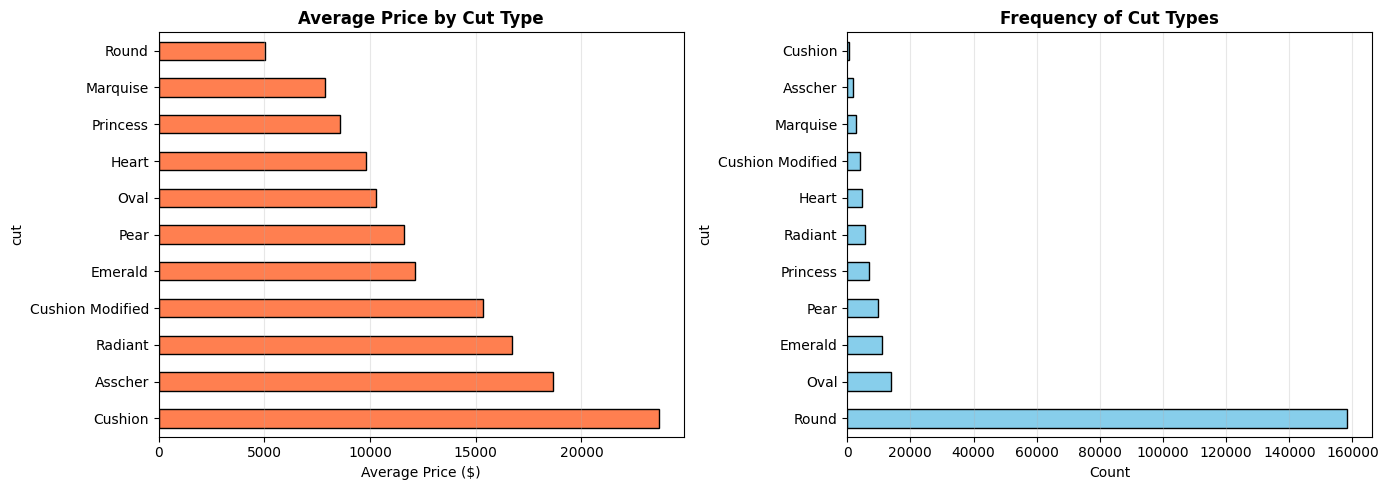

In [49]:
print(df['cut'].value_counts())

print(f"\nAverage Price by Cut:")
cut_prices = df.groupby('cut')[target].mean().sort_values(ascending=False)
print(cut_prices)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cut_prices.plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_xlabel('Average Price ($)')
axes[0].set_title('Average Price by Cut Type', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

df['cut'].value_counts().plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Count')
axes[1].set_title('Frequency of Cut Types', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()



Color Grades:
color
D          30873
E          33103
F          31566
G          29184
H          26073
I          22364
J          16898
K          11750
L           5683
M           3047
unknown     9162
Name: count, dtype: int64

Average Price by Color:
color
unknown    19166.869788
H           7598.123308
G           7156.929927
I           6853.358165
J           6489.142680
K           6280.997277
D           6262.167039
M           5987.224811
L           5949.089917
F           5603.393937
E           5321.490409
Name: total_sales_price, dtype: float64


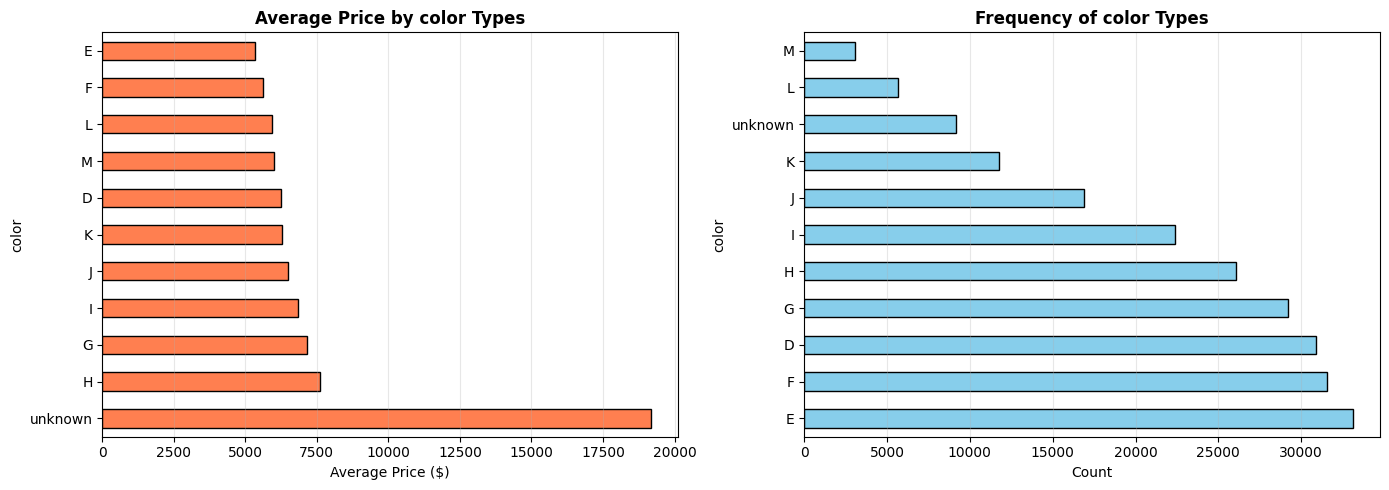

In [54]:
print(f"\nColor Grades:")
print(df['color'].value_counts().sort_index())

print(f"\nAverage Price by Color:")
color_prices = df.groupby('color')[target].mean().sort_values(ascending=False)
print(color_prices)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

color_prices.plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_xlabel('Average Price ($)')
axes[0].set_title('Average Price by color Types', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

df['color'].value_counts().plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Count')
axes[1].set_title('Frequency of color Types', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [66]:
meas_cols = ['meas_length', 'meas_width', 'meas_depth']
print(df[meas_cols].describe())

print(f"\nCorrelation between Measurements and Carat:")
for col in meas_cols:
  corr = df[col ].corr(df['carat_weight'])
  print(f"   {col} ↔ carat_weight: {corr:.3f}")


         meas_length     meas_width     meas_depth
count  219703.000000  219703.000000  219703.000000
mean        5.548853       5.135626       3.285699
std         1.763924       1.374529       2.054822
min         0.000000       0.000000       0.000000
25%         4.350000       4.310000       2.680000
50%         5.060000       4.800000       3.030000
75%         6.350000       5.700000       3.630000
max        93.660000      62.300000      76.300000

Correlation between Measurements and Carat:
   meas_length ↔ carat_weight: 0.783
   meas_width ↔ carat_weight: 0.789
   meas_depth ↔ carat_weight: 0.351


In [68]:
#Missing Values

df.isnull().sum()

,0
Unnamed: 0,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0


#Report
* This EDA examined 219,793 diamond records with 26 features to understand what drives diamond pricing.
* Critical Issue: Price is extremely right-skewed (skewness = 19.41), violating normality assumption
* Multicollinearity Detected: Physical measurements highly correlated with carat weight (r > 0.78)
* Data Quality: No missing values, clean dataset

###Action:
* DROP: meas_length, meas_width (redundant with carat)
* KEEP: meas_depth (r=0.351 - independent enough to provide value)
* KEEP: carat_weight (strongest predictor)


# Predict total_sales_price


In [74]:
label = 'total_sales_price'

features = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']
cat_features = ['cut', 'cut_quality']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


In [80]:
# Q3 (2 points)
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = encoder.fit_transform(df[cat_features])
cat_feature_names = encoder.get_feature_names_out(cat_features)

cat_encoded_df = pd.DataFrame(
    cat_encoded,
    columns=cat_feature_names,
    index=df.index
)


X_numerical = df[features]
X = pd.concat([X_numerical, cat_encoded_df], axis=1)

y = df[label]

data_subset = pd.concat([X, y], axis=1)
data_subset.head()



,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,...,cut_Pear,cut_Princess,cut_Radiant,cut_Round,cut_quality_Fair,cut_quality_Good,cut_quality_Ideal,cut_quality_Very Good,cut_quality_unknown,total_sales_price
0,0.09,62.7,59.0,2.85,2.87,1.79,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,200
1,0.09,61.9,59.0,2.84,2.89,1.78,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,200
2,0.09,61.1,59.0,2.88,2.90,1.77,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,200
3,0.09,62.0,59.0,2.86,2.88,1.78,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,200
4,0.09,64.9,58.5,2.79,2.83,1.82,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,200


In [85]:
# Q4 (1 point)

X = data_subset.drop('total_sales_price', axis=1)
y = data_subset['total_sales_price']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility
)


print(f"\nTest set:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")

print(f"\nSplit ratio:")
print(f"   Training: {len(X_train):,} diamonds ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Testing:  {len(X_test):,} diamonds ({len(X_test)/len(X)*100:.1f}%)")


Test set:
   X_test shape: (43941, 21)
   y_test shape: (43941,)

Split ratio:
   Training: 175,762 diamonds (80.0%)
   Testing:  43,941 diamonds (20.0%)


In [90]:
# Q5 (1 point)

# Check training data
#Already checked during EDA --> No NaNs

In [95]:
# Q6 (1 point)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
#Make predictions on test set
y_pred = model.predict(X_test)

In [100]:
# Q7 (1 point)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


#Additional metric I decided to use
r2 = r2_score(y_test, y_pred)
print(f"\nR² Score: {r2:.4f}")
print(f"   → Model explains {r2*100:.2f}% of variance in diamond prices")

print(f"\nRMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"   → On average, predictions are off by ${rmse:,.2f}")


R² Score: 0.5779
   → Model explains 57.79% of variance in diamond prices

RMSE (Root Mean Squared Error): $18,107.75
   → On average, predictions are off by $18,107.75


#Why Result aren't Great?
###Problem 1: Normality Assumption Violated
* Price skewness = 19.41 (EXTREME right skew)
* Assignment didn't ask for transformations --> I  followed the specifications exactly


###Problem 2: Multicollinearity
* meas_length ↔ carat_weight: r = 0.783
* meas_width ↔ carat_weight: r = 0.789
* Again, I didnt fix it, I just followed the assingment requirments

